In [14]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Import cleaned dataset

In [4]:
df = pd.read_csv('CaseStudy2Data/web_log_data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 6 columns):
ip           5866 non-null object
date_time    5866 non-null object
request      5866 non-null object
step         5866 non-null int64
session      5866 non-null int64
user_id      5866 non-null int64
dtypes: int64(3), object(3)
memory usage: 275.0+ KB


,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22
5,cpe-144-136-135-38.q,19/Apr/2005:10:13:37,/,1,23,23
6,225-145-222-203.rev.,19/Apr/2005:11:48:32,/,1,25,25
7,cpe-138-130-198-54.q,19/Apr/2005:12:31:54,/,1,26,26
8,203-219-44-170-qld.t,19/Apr/2005:12:33:49,/,1,29,29
9,cpe-138-130-198-54.q,19/Apr/2005:12:42:51,/,1,30,30


In [5]:
#find missing data in a dataset
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))

user_id      0
session      0
step         0
request      0
date_time    0
ip           0
dtype: int64


In [6]:
#data time
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
df['date_time'] =  pd.to_datetime(df['date_time'], format="%d/%b/%Y:%H:%M:%S")

In [7]:
# Create features for year, month, day, hour, and minute 
df['year'] = df['date_time'].dt.year 
df['month'] = df['date_time'].dt.month 
df['day'] = df['date_time'].dt.day 
df['hour'] = df['date_time'].dt.hour 
df['minute'] = df['date_time'].dt.minute

In [8]:
df.head()

,ip,date_time,request,step,session,user_id,year,month,day,hour,minute
0,c210-49-32-6.rochd2.,2005-04-18 21:25:07,/,1,3,3,2005,4,18,21,25
1,visp.inabox.telstra.,2005-04-19 08:24:28,/,1,12,12,2005,4,19,8,24
2,dsl-61-95-54-84.requ,2005-04-19 08:33:01,/,1,13,13,2005,4,19,8,33
3,d220-236-91-52.dsl.n,2005-04-19 09:16:06,/,1,15,15,2005,4,19,9,16
4,allptrs.eq.edu.au,2005-04-19 09:47:54,/,1,22,22,2005,4,19,9,47


In [26]:
l = df.groupby(['user_id'])['step'].value_counts()
l

user_id  step
1        1       1
2        1       1
3        1       1
         2       1
         3       1
         4       1
         5       1
4        1       1
5        1       1
6        1       1
         2       1
         3       1
         4       1
         5       1
7        1       1
         2       1
         3       1
         4       1
         5       1
         6       1
8        1       1
9        1       1
10       1       1
         2       1
         3       1
         4       1
         5       1
         6       1
11       1       1
         2       1
                ..
1932     7       1
         8       1
         9       1
         10      1
1933     1       1
         2       1
         3       1
1934     1       1
         2       1
         3       1
         4       1
         5       1
         6       1
         7       1
         8       1
         9       1
1935     1       1
         2       1
         3       1
         4       1
         5       

# Part 4 Clustering

In [5]:
#df = pd.concat([df,pd.get_dummies(df['ip'], prefix='ip', prefix_sep='_', columns= (''))], axis=1)
#df.drop(['ip'],axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler

# take 3 variables and drop the rest
df2 = df[['step','hour']]

# convert df2 to matrix
X = df2.as_matrix()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
D:\Programs\conda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programs\conda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 4524.737226854872
Centroid locations:
[-0.28402945 -0.94790009]
[2.50639176 0.38314875]
[-0.20878737  0.69258129]


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Programs\conda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)


Cluster membership
2    2970
0    2379
1     517
Name: Cluster_ID, dtype: int64


D:\Programs\conda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


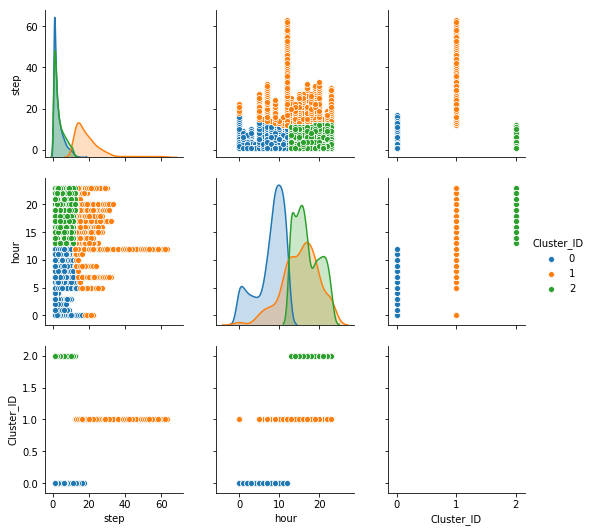

In [15]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns

model = KMeans(n_clusters=3, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

#### Analysis
step
* Cluster 0 have considerable higher number of steps taken during surfing
* Cluster 1 and 2, both have minimal steps taken (0-20) in a single log in

session
* Cluster 0 have dense distributed session id and significantlyhave more steps (>20)  
* Cluster 1 and have session id 1-1000, 2000 respectively. Both have only steps of 20 or less in each session.

In [13]:
print(df['step'].value_counts())

1     1939
2      960
3      600
4      424
5      334
6      277
7      223
8      183
9      144
10     122
11      99
12      74
13      65
14      54
15      46
16      37
17      34
18      30
19      27
20      26
21      24
22      20
23      15
24      14
25      12
26      11
27      11
29       7
28       7
30       6
      ... 
55       1
47       1
60       1
56       1
52       1
44       1
40       1
36       1
48       1
57       1
37       1
41       1
39       1
35       1
51       1
62       1
58       1
54       1
50       1
46       1
42       1
38       1
34       1
59       1
61       1
43       1
53       1
49       1
45       1
63       1
Name: step, Length: 63, dtype: int64


# Part4.2 Association mining

In [10]:
# group by account, then list all services
transactions = df.groupby(['ip'])['request'].apply(list)
print(transactions.head(20))

ip
002.b.004.brs.iprimu                                  [/, /services.html]
034.mel0205.mel.ipri                                                  [/]
038.b.004.brs.iprimu                                                  [/]
042.058.dsl.mel.ipri                                                  [/]
058.a.001.cns.iprimu    [/eaglefarm/, /eaglefarm/javascript/menu.js, /...
081.a.004.syd.iprimu                                                  [/]
086.a.002.brs.iprimu         [/eaglefarm/, /eaglefarm/javascript/menu.js]
099.a.001.brs.iprimu                             [/, /, /springwood.html]
1.cust21.qld.dsl.oze                                    [/, /favicon.ico]
103.cust20.qld.dsl.o    [/, /favicon.ico, /favicon.ico, /favicon.ico, ...
107.a.004.brs.iprimu    [/, /, /acacia.html, /direct.html, /eaglefarm,...
11.128-142-203.dart.                    [/, /services.html, /whoare.html]
114.a.001.brs.iprimu    [/, /acacia.html, /direct.html, /eaglefarm, /e...
118.a.002.gct.iprimu    [/, /acacia

In [11]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

In [12]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.1, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'/eaglefarm/', '/eaglefarm/javascript/menu.js'}), support=0.21597300337457817, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/eaglefarm/'}), items_add=frozenset({'/eaglefarm/javascript/menu.js'}), confidence=0.923076923076923, lift=3.6150457472043374), OrderedStatistic(items_base=frozenset({'/eaglefarm/javascript/menu.js'}), items_add=frozenset({'/eaglefarm/'}), confidence=0.8458149779735682, lift=3.615045747204337)]), RelationRecord(items=frozenset({'/eaglefarm/', '/eaglefarm/pdf/Web_Price_List.pdf'}), support=0.140607424071991, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/eaglefarm/'}), items_add=frozenset({'/eaglefarm/pdf/Web_Price_List.pdf'}), confidence=0.6009615384615384, lift=3.7360476062399135), OrderedStatistic(items_base=frozenset({'/eaglefarm/pdf/Web_Price_List.pdf'}), items_add=frozenset({'/eaglefarm/'}), confidence=0.8741258741258741, lift=3.7360476062399135)]), RelationRecord(items=frozenset({'/eaglefarm/', '/

In [13]:
result_df = convert_apriori_results_to_pandas_df(results)
print(result_df.head(20))

                            Left_side                         Right_side  \
0                         /eaglefarm/      /eaglefarm/javascript/menu.js   
1       /eaglefarm/javascript/menu.js                        /eaglefarm/   
2                         /eaglefarm/  /eaglefarm/pdf/Web_Price_List.pdf   
3   /eaglefarm/pdf/Web_Price_List.pdf                        /eaglefarm/   
4                         /eaglefarm/               /eaglefarm/pricelist   
5                /eaglefarm/pricelist                        /eaglefarm/   
6                         /eaglefarm/              /eaglefarm/pricelist/   
7               /eaglefarm/pricelist/                        /eaglefarm/   
8       /eaglefarm/javascript/menu.js  /eaglefarm/pdf/Web_Price_List.pdf   
9   /eaglefarm/pdf/Web_Price_List.pdf      /eaglefarm/javascript/menu.js   
10      /eaglefarm/javascript/menu.js               /eaglefarm/pricelist   
11               /eaglefarm/pricelist      /eaglefarm/javascript/menu.js   
12      /eag

In [14]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(15))

                            Left_side                         Right_side  \
19              /eaglefarm/pricelist/               /eaglefarm/pricelist   
18               /eaglefarm/pricelist              /eaglefarm/pricelist/   
17              /eaglefarm/pricelist/  /eaglefarm/pdf/Web_Price_List.pdf   
16  /eaglefarm/pdf/Web_Price_List.pdf              /eaglefarm/pricelist/   
14  /eaglefarm/pdf/Web_Price_List.pdf               /eaglefarm/pricelist   
15               /eaglefarm/pricelist  /eaglefarm/pdf/Web_Price_List.pdf   
4                         /eaglefarm/               /eaglefarm/pricelist   
5                /eaglefarm/pricelist                        /eaglefarm/   
13              /eaglefarm/pricelist/      /eaglefarm/javascript/menu.js   
12      /eaglefarm/javascript/menu.js              /eaglefarm/pricelist/   
11               /eaglefarm/pricelist      /eaglefarm/javascript/menu.js   
10      /eaglefarm/javascript/menu.js               /eaglefarm/pricelist   
7           

In [15]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(15))

                            Left_side                         Right_side  \
18               /eaglefarm/pricelist              /eaglefarm/pricelist/   
19              /eaglefarm/pricelist/               /eaglefarm/pricelist   
13              /eaglefarm/pricelist/      /eaglefarm/javascript/menu.js   
11               /eaglefarm/pricelist      /eaglefarm/javascript/menu.js   
16  /eaglefarm/pdf/Web_Price_List.pdf              /eaglefarm/pricelist/   
9   /eaglefarm/pdf/Web_Price_List.pdf      /eaglefarm/javascript/menu.js   
14  /eaglefarm/pdf/Web_Price_List.pdf               /eaglefarm/pricelist   
0                         /eaglefarm/      /eaglefarm/javascript/menu.js   
5                /eaglefarm/pricelist                        /eaglefarm/   
17              /eaglefarm/pricelist/  /eaglefarm/pdf/Web_Price_List.pdf   
7               /eaglefarm/pricelist/                        /eaglefarm/   
15               /eaglefarm/pricelist  /eaglefarm/pdf/Web_Price_List.pdf   
3   /eaglefa